In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import itertools
import xml.etree.ElementTree as ET

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
def collectDiagonalRealCorrelatorAtTime(data_object, corr_str, time):
    corr_key = f"<MCObservable><CorrT>GI{{{corr_str}}} GI{{{corr_str}}} time={time} HermMat<|CorrT><Arg>Re<|Arg><|MCObservable>"
    return data_object['rotated_correlators']['Values'][corr_key][()]
def collectCorrEstimates(data_object, corr_str):
    t = []
    values = []
    errs = []
    for i in range(64):
        try:
            this_corrt = collectDiagonalRealCorrelatorAtTime(data_object,corr_str,i)
            t.append(i)
            values.append(this_corrt[0])
            errs.append(utils.bootstrap_error_by_array(this_corrt))
        except:
            pass
        
    return t, values, errs

def collectEnergyEstimates(data_object, corr_str):
    t = []
    values = []
    errs = []
    for i in range(63):
        try:
            this_corrt = collectDiagonalRealCorrelatorAtTime(data_object,corr_str,i)
            this_corrt2 = collectDiagonalRealCorrelatorAtTime(data_object,corr_str,i+1)
            new_t, this_effE = utils.effenergy(np.array([i,i+1]),np.array([this_corrt,this_corrt2]))
            if not np.isnan([this_effE[0][0]])[0] and not np.isnan([utils.bootstrap_error_by_array(this_effE[0])])[0]:
                t.append(new_t[0])
                values.append(this_effE[0][0])
                errs.append(utils.bootstrap_error_by_array(this_effE[0]))
        except:
            pass
        
    return t, values, errs

In [3]:
#isosinglet nn
files = {
    "Single Pivot n4 m4 d10": "isosinglet_nn_4-10",
    "Traditional Rolling Pivot": "isosinglet_nn_4-10r",
}

In [4]:
corrs = []
for pivot in files.keys():
    hdf5_data = h5py.File(os.path.join(files[pivot],"rotated_correlators.hdf5"))
    #get all correlator data
    for MCObservable in hdf5_data['rotated_correlators']['Values'].keys():
        MCObservableTree = ET.fromstring(MCObservable.replace("|","/"))
        corr_string = MCObservableTree.find('CorrT').text
        sink_str = corr_string.split('{')[1][:-4]
        source_str = corr_string.split('}')[1][4:]
        if sink_str not in corrs:
            corrs.append(sink_str)
        if source_str not in corrs:
            corrs.append(source_str)
    hdf5_data.close()

<ipython-input-4-4e9a7d69ba4c>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hdf5_data = h5py.File(os.path.join(files[pivot],"rotated_correlators.hdf5"))


In [5]:
corrs

['isosinglet S=0 P=(0,0,0) A2g ROT 0',
 'isosinglet S=0 P=(0,0,0) A2g ROT 1',
 'isosinglet S=0 P=(0,0,0) Eg ROT 0',
 'isosinglet S=0 P=(0,0,0) Eg ROT 1',
 'isosinglet S=0 P=(0,0,0) T1g ROT 0',
 'isosinglet S=0 P=(0,0,0) T1g ROT 1',
 'isosinglet S=0 P=(0,0,0) T1g ROT 2',
 'isosinglet S=0 P=(0,0,0) T1g ROT 3',
 'isosinglet S=0 P=(0,0,0) T1g ROT 4',
 'isosinglet S=0 P=(0,0,0) T1g ROT 5',
 'isosinglet S=0 P=(0,0,0) T1g ROT 6',
 'isosinglet S=0 P=(0,0,0) T1g ROT 7',
 'isosinglet S=0 P=(0,0,0) T1u ROT 0',
 'isosinglet S=0 P=(0,0,0) T1u ROT 1',
 'isosinglet S=0 P=(0,0,0) T1u ROT 2',
 'isosinglet S=0 P=(0,0,0) T2g ROT 0',
 'isosinglet S=0 P=(0,0,0) T2g ROT 1',
 'isosinglet S=0 P=(0,0,0) T2g ROT 2',
 'isosinglet S=0 P=(0,0,0) T2g ROT 3',
 'isosinglet S=0 PSQ=1 A1 ROT 0',
 'isosinglet S=0 PSQ=1 A1 ROT 1',
 'isosinglet S=0 PSQ=1 A1 ROT 2',
 'isosinglet S=0 PSQ=1 A1 ROT 3',
 'isosinglet S=0 PSQ=1 A1 ROT 4',
 'isosinglet S=0 PSQ=1 A1 ROT 5',
 'isosinglet S=0 PSQ=1 A2 ROT 0',
 'isosinglet S=0 PSQ=1 

<ipython-input-6-40cde0496218>:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hdf5_data = h5py.File(os.path.join(files[pivot],"rotated_correlators.hdf5"))
..\utils.py:22: RuntimeWarning: invalid value encountered in log
  return t[:-1]+0.5*(t[1]-t[0]), np.log( C[:-1]/C[1:] )
<ipython-input-6-40cde0496218>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-6-40cde0496218>:1

[1.1259652184912972, 0.992750700817979, 0.9130631724315315, 0.8604070984660135, 0.8237676488549786, 0.7952452250820974, 0.778868001087255, 0.7619250700385116, 0.7481962242108815, 0.739493664491233, 0.7162530933094032, 0.6782648408614927, 0.6751844471734874, 0.6985589247495577, 0.6100442700476589, 0.601001830925841, 0.6383884770798749, 0.5183671502660301] [0.0006513505671928418, 0.000652192898250482, 0.0008066982164427892, 0.0007998205228420801, 0.0009982394738852838, 0.001262991432734219, 0.0018942635682272825, 0.00286845143658374, 0.003399437730534721, 0.005682999203515325, 0.01688946662840747, 0.022876549189085913, 0.026832695770255058, 0.048941573446267206, 0.06916901019355882, 0.10444276786767268, 0.1527201761770605, 0.24092596964173937]
[1.1259587992335696, 0.9927416467811245, 0.9130574854826116, 0.860406446733251, 0.8237670580508044, 0.7952409853435174, 0.7788687646845344, 0.7619354756656682, 0.7481833017526899, 0.7391739795679679, 0.7154065187633637, 0.6755662330017808, 0.672990

[1.1024901970333674, 0.9694934309717202, 0.8894145484383906, 0.8362646662681327, 0.798690750136407, 0.7701930576991728, 0.7499293452503943, 0.7351705864098558, 0.7219982818099142, 0.7161436143442688, 0.6973166883987592, 0.7142368618468721, 0.7016958134036121, 0.7150712252573742, 0.6844618804106872, 0.7252650229629202, 0.5821253699649824, 0.7568132385174808] [0.0006406568401881689, 0.000632875532450122, 0.0007984941430387573, 0.0007806335591538796, 0.0008550917608669006, 0.0009169681023701023, 0.001133211649616157, 0.0013517034820350736, 0.002425155913243789, 0.0027077581001531126, 0.005799860643634643, 0.01088214599428877, 0.01238426536828058, 0.02630107741778597, 0.03273283512693151, 0.0581734610811205, 0.08391749998369119, 0.13917429341925414]
[1.1025794143402585, 0.9695972589171504, 0.8895142616417264, 0.8363370306045742, 0.798656377145582, 0.7701034495056945, 0.7499591406535127, 0.7350926946512625, 0.7218587080335931, 0.7156487467506684, 0.6964772144171663, 0.7130569127320754, 0.69

[1.101981854328035, 0.9691253664437889, 0.8892476141092176, 0.8365072341420082, 0.7992032673366796, 0.7702398836230081, 0.7510292701502612, 0.7328990781030217, 0.7225010213477777, 0.7099521746253685, 0.6968325297551151, 0.6946005882663133, 0.7002498834619335, 0.6833970418807319, 0.7193483165538584, 0.6191343635528149, 0.6654284512505956, 0.7457371540931814] [0.0006467782790979213, 0.0006380925465260787, 0.0008057261029410255, 0.0008056683395621714, 0.00088922849517009, 0.0009487653189926399, 0.001041462060648013, 0.0018819113993162502, 0.0021667962708560606, 0.0027075673865650297, 0.004913311660698247, 0.006834154468097678, 0.01129312741249611, 0.018382646602276995, 0.029120631570250907, 0.04900637324761018, 0.09787408563424933, 0.14214401895013504]
[1.1019236871917828, 0.9691047312566938, 0.8892426332785403, 0.8365065112033881, 0.799205661541257, 0.7702383020148263, 0.7510265912579922, 0.732906648168193, 0.7224891055786458, 0.7099101217898965, 0.6967914404905299, 0.694193563877321, 0.

[1.1502601537713828, 1.0164496809793744, 0.9367454096003951, 0.8844255997771313, 0.8484445621757277, 0.8199624557723486, 0.7997700457568784, 0.7859805555203392, 0.7748666253206034, 0.7731308875443543, 0.7466448511653033, 0.7588389553953319, 0.7256097786800607, 0.745496654387337, 0.6311752183731408, 0.649051191381084, 0.7430619492218502, 0.41746804682164435] [0.0006666547179062979, 0.0006331824044683211, 0.0008223415696184272, 0.0008001958082337171, 0.0009432395972002361, 0.001050997568486128, 0.0012520629078982793, 0.0018242172066644652, 0.0029878459099719444, 0.005065145241511051, 0.008623282514054887, 0.01654513479947781, 0.024281492128603085, 0.03997291986818372, 0.0639819261041314, 0.11599776537092253, 0.1969426053358193, 0.3019168344532142]
[1.1502906918941913, 1.016472983581175, 0.9367632657537871, 0.8844384312362947, 0.8484720901026354, 0.8199601452948347, 0.7997477236487374, 0.7859469725665311, 0.7748941399121057, 0.7732182911145553, 0.7476330682688196, 0.7632755699076712, 0.73

[1.087663773282561, 0.9543101853384746, 0.8733906605244787, 0.8192220362699525, 0.7807040373327329, 0.750902746722384, 0.7294216943191214, 0.7168999489015525, 0.697855282813335, 0.690532266146564, 0.6862440209024591, 0.6820700395105319, 0.6757344865977585, 0.7045853126661796, 0.5804707229275867, 0.6712925707706101, 0.5760403356370318, 0.894273824430562] [0.0006597450369850308, 0.0006467132707743056, 0.000825798361309645, 0.0007858963813583103, 0.0009077797582031967, 0.0009786489179901185, 0.0015959613060820199, 0.0013582098596320084, 0.0030295293920023733, 0.002597054036039221, 0.003770814062281235, 0.01184893408059218, 0.012265786365376345, 0.026945333182503656, 0.05348244625554178, 0.03775009942962727, 0.06235791311677148, 0.24144041798183205]
[1.087198845728133, 0.9539220074797342, 0.8730399778108409, 0.8189378092665492, 0.7804595831704177, 0.7509196970067598, 0.7297074180588741, 0.7174766387567815, 0.6970962440496522, 0.6880137590614276, 0.6820196244780798, 0.6735774154404965, 0.66

[1.1128365748014934, 0.9796198479840365, 0.8994360596165261, 0.8466450629305412, 0.8088000531356692, 0.7823175234918774, 0.7633607806478285, 0.7562504216982456, 0.7412601096743417, 0.7432611772198595, 0.7054679469146927, 0.651054603450602, 0.6904149048707847, 0.7167073205914031, 0.7383444387151858, 0.7172125093969353] [0.0006603326890508959, 0.0006427232248546131, 0.0007927213703802149, 0.000813576213338117, 0.0009978957129775788, 0.0018265588196457341, 0.003600151620207266, 0.009935977984642791, 0.006227018186720822, 0.02098667313573777, 0.006678988493506718, 0.06205939895219559, 0.01660005213981518, 0.04437599786579092, 0.05450909593795561, 0.09285855683478157]
[1.1129350437456462, 0.9797970639751887, 0.8997550036634215, 0.8469286010254554, 0.8096394590316434, 0.781513096223165, 0.7628421731476152, 0.7561315684293874, 0.7411442475655262, 0.7346556384368389, 0.6978777327838628, 0.663489552033862, 0.6779908290144726, 0.6414161924814068, 0.7246441796363247, 0.7113569212395503] [0.000659

[1.088172572439442, 0.9550476719863517, 0.8744522901639459, 0.820547613016144, 0.7820373594610515, 0.7526850398044073, 0.7328389594731718, 0.7150733241208055, 0.7009488076544386, 0.6972063911732389, 0.6826622662645194, 0.676731254919976, 0.661171489835275, 0.6761723078480606, 0.6826203188587846, 0.6572384234289957, 0.6336754547592962, 0.6789571065438896, 0.6059997177920199, 0.38789680619470424] [0.0006515352656009289, 0.0006452302344181367, 0.0008162502921787915, 0.0007980428648823142, 0.000867844692404384, 0.0009040459085160802, 0.0011528989777973612, 0.0013952683855559045, 0.0019864020249542947, 0.004955871633145821, 0.0029416818347378264, 0.0045126267663564285, 0.012821310238472886, 0.013972103250265433, 0.021971620485557317, 0.043596350472577296, 0.05042898434439063, 0.11848583652175282, 0.15024413870725573, 0.1867477285899777]
[1.0879179247677533, 0.9548650663268013, 0.8743174507243062, 0.8204824912128247, 0.7819748929767604, 0.7526777089548268, 0.7328948497344657, 0.7152871924363

[1.1377983773433018, 1.0043189272001942, 0.9245700198086214, 0.8724099624724684, 0.8359151740443816, 0.807202275028946, 0.7860142922901201, 0.7704031432687716, 0.7588076388081438, 0.7347671014532631, 0.7227240220687282, 0.730041209277344, 0.7386674096074525, 0.7343239288347125, 0.6664731608812781] [0.0006674591067094439, 0.0006357102595473849, 0.0008216789138096882, 0.0008238870700794347, 0.0011278793670093496, 0.0009946041680246492, 0.0021040704560093956, 0.002480585511471518, 0.0042191907681755824, 0.021860508746906704, 0.018362902842542803, 0.008212861235015323, 0.014911786631938213, 0.03130623543221678, 0.05929999662252252]
[1.1377855027906632, 1.0042906051945166, 0.9245043587235241, 0.8720835645646463, 0.8352893682454603, 0.807209023086059, 0.7860906727082931, 0.7713378795853242, 0.7594358209449462, 0.7286857237726159, 0.7326741684861541, 0.7401826437060712, 0.7272242593492723, 0.7355470330274865, 0.530125705987272, 0.8665392508742118] [0.0006664325891689912, 0.0006371937416021203

[1.1268561790303522, 0.9938263289925132, 0.9142993890495613, 0.8618323041577886, 0.8258921249006919, 0.7988735031132833, 0.7800235270165014, 0.7702400646857072, 0.7563048885094911, 0.729964747613813, 0.7916537173431845, 0.7219020059701196, 0.6779994236695239, 0.7761872848780572, 0.7282426443458685, 0.4808120189455344] [0.000657031466188707, 0.0006446453224380736, 0.0008393746429933355, 0.0009053478086652823, 0.0015040034814975635, 0.0018419698976230349, 0.003180398466727477, 0.010368386018510582, 0.008578431036572633, 0.01346445237533108, 0.07164285343162877, 0.03133025646647298, 0.05627834804676766, 0.11633655216564294, 0.062417159880006345, 0.22200894845012345]
[1.1270188192086519, 0.9940186115331793, 0.9145527558379769, 0.862216665953119, 0.8266104002587493, 0.7986564948866071, 0.7798960701407994, 0.7692285258462812, 0.7566441876742132, 0.6829926996139428, 0.7168377996864777, 0.6981057843704485, 1.0454291475506472] [0.0006473330737723313, 0.0006393254769615335, 0.0008394463362855913

[1.1252850851047491, 0.9918518281238053, 0.911872561900627, 0.8593297895525609, 0.821792994581112, 0.79349795712482, 0.7737392511881563, 0.7620965767949416, 0.743600330577097, 0.7446427774887163, 0.7358565862991159, 0.7076793899399619, 0.6989191960511896, 0.622251946295563, 0.7100338813351595, 0.7577933296428823, 0.5896689639410138, 0.6120694489343521, 0.1586522123314267] [0.0006550752776831477, 0.0006357870088425558, 0.0008025289655086567, 0.0008196287787474117, 0.0008802576115918926, 0.0009689618367793482, 0.0016169197265048832, 0.0022160204589150743, 0.004359768188326198, 0.006906464036286447, 0.00629580521568386, 0.012187822222867182, 0.010890159834255718, 0.08430274219421849, 0.06794869714749614, 0.06548094430644841, 0.09103077695771022, 0.1843625207292415, 0.3404136682519356]
[1.1250938440150313, 0.9916633095841692, 0.911545117858038, 0.8588853879500743, 0.8218245050103955, 0.7933996296672426, 0.7750996041658962, 0.7615748864905703, 0.7447221552055051, 0.7369691192921991, 0.72386

[1.1252289035386853, 0.9917950083125233, 0.9117855406165283, 0.8592133903918019, 0.8217167407388003, 0.7926083632934532, 0.772193481493013, 0.7580709898101298, 0.749616880527155, 0.746199412237325, 0.7102098661727239, 0.7254646299824414, 0.7115239095627939, 0.679914532303795, 0.7440629353796755, 0.646905187225319, 0.8228136671858172, 0.474773358362831] [0.0006521706627990345, 0.0006403797698091599, 0.000802166330251057, 0.0008073208173696534, 0.0009357024110278037, 0.0009204957163694359, 0.0019654654614982173, 0.0017671364471293451, 0.002083813775761146, 0.010518077203449439, 0.013082340762941945, 0.00667188537507798, 0.011867492874798723, 0.04285703407476907, 0.062171383567320215, 0.05700623525853432, 0.1394367848059558, 0.1357453456312973]
[1.125098012973293, 0.9916342157613103, 0.9115736569747521, 0.8587708137049525, 0.8214726103878706, 0.7925151433474331, 0.77243420221378, 0.7588220797149385, 0.7469441546407685, 0.7428177088613981, 0.7085371289597606, 0.7094309816023269, 0.69731515

[1.150991314522259, 1.0175238476101418, 0.9379401562498936, 0.885448476476642, 0.8486921053771501, 0.8228169239276465, 0.801454189947577, 0.795208292986154, 0.7812684283464746, 0.7853350434379467, 0.7453980811135199, 0.7462547489443313, 0.6682315538041531, 0.6130651274666891, 0.7725058113250097, 0.45893300758642724, 0.5498999894157862, 0.7256997664729629, 0.20105108392345633] [0.0006662482546113277, 0.0006422079038780844, 0.0008026282992691173, 0.0008179612238005167, 0.0008830246560234632, 0.0018097380925010385, 0.0012262159371405567, 0.008049518246583811, 0.009886780875899979, 0.019482351901941645, 0.01530604964705376, 0.013526067823963522, 0.05706490209931158, 0.09710803982830928, 0.14275608182929614, 0.17178307989419864, 0.23622362706499828, 0.28636398640974003, 0.37541333601566657]
[1.1514382917247732, 1.0178595868564813, 0.9382362602356233, 0.8858183685613337, 0.8487523012277305, 0.8228420414047946, 0.8015820702819827, 0.7943291032536012, 0.783974867100972, 0.801356265711304, 0.75

[1.1253800154675477, 0.9920548281581973, 0.9119971067364807, 0.8592129324513877, 0.8225636287617276, 0.7931668799888748, 0.7755504656610303, 0.7596648809082902, 0.7522279319795584, 0.7368448274223082, 0.7380493801516282, 0.7148299874556641, 0.6961579275943337, 0.6887410095982408, 0.709814923724872, 0.6467713199400673, 0.8153057366022491, 0.8866218529280282] [0.0006587641256681785, 0.0006480509260072975, 0.0007981570636587137, 0.0008101788970956249, 0.0009148897965137592, 0.0008922824029923724, 0.001506181445918168, 0.0019056124815933736, 0.0053950653098650565, 0.002422109886850059, 0.01154844515579706, 0.008419764677727115, 0.014545333106474824, 0.01801838561061862, 0.027517506991350908, 0.041326421329169416, 0.0740995621062075, 0.3016911271459475]
[1.1253140240137118, 0.9919994718378228, 0.9119625759419145, 0.8592330892402495, 0.8226212255612475, 0.7931472880449385, 0.7759476108477239, 0.7592441048717182, 0.7510620535564763, 0.7391809827327338, 0.7327733305669695, 0.7020688879476655, 

[1.115306639937252, 0.9825289322126285, 0.9027302452989583, 0.8508311764062519, 0.8148291540893551, 0.7910796150066889, 0.7660420930212898, 0.7637319780795506, 0.7298943571387398, 0.6867567036700726, 0.699516642821324, 0.7742464353362761, 0.5404467301329063, 0.3579020756828164, 0.17799069178778099, 0.34786875414923946, 0.25008627142745476] [0.0006235077322817968, 0.0006825674192703858, 0.0008657835710294051, 0.0012668914196184424, 0.002400159789252865, 0.006911013125588576, 0.0014770581049940354, 0.01873154244106515, 0.009498888028181031, 0.037281885614223555, 0.015051817641022912, 0.06865658948217605, 0.13185723880234998, 0.2674604974310756, 0.3169987894459444, 0.16186214726344625, 0.17388827058940795]
[1.1147967484530987, 0.9820872205059548, 0.9024241869307499, 0.850538165600914, 0.8144516019701827, 0.7919155683629936, 0.7660679381691653, 0.7638468008680879, 0.73340700632748, 0.7080636852689345, 0.7095794882066273, 0.7579052085998776, 0.6426558356112346, 0.8705123894585665, 0.6855410

[1.1664305872351206, 1.0332507667562925, 0.9539470436471289, 0.9021879679590763, 0.8659168492404689, 0.838929996010087, 0.8192364577009477, 0.8034971740482028, 0.7950388461281842, 0.7872099604624163, 0.7936336376996898, 0.7823960015787771, 0.7413694084894703, 0.7631617627253899, 0.7074240052030353, 0.7263210326797069] [0.0006601359126629594, 0.0006342986536888311, 0.000822938757413528, 0.0008554313802932677, 0.0009190735839946155, 0.0011909111957978543, 0.0013103948132994457, 0.002496326918816396, 0.003658795483506212, 0.006684369049968258, 0.009344393950407544, 0.029736514393327067, 0.051042195028074756, 0.082353727955442, 0.12675996364460787, 0.1444179510295689]
[1.1665491212311043, 1.0333690791980927, 0.9540692615523619, 0.9022459973994732, 0.8660341349966594, 0.8390944357593434, 0.8196820226372759, 0.8025896362607979, 0.7988790355665859, 0.7922916218963322, 0.8172986190134579, 0.7747150285477845, 0.7798265080630615] [0.0006596048280601335, 0.000634313798930341, 0.000825258300714426

[1.162612589609168, 1.0286103383659333, 0.9489206917166324, 0.8964806630602309, 0.8605666618883183, 0.8323879857815923, 0.8090518705341256, 0.7939127910580442, 0.7765864059674622, 0.7632696488064076, 0.7620911473967599, 0.8379092793338618, 0.6482478884506069, 0.8039057226231856, 0.6477484467778416, 0.5228171795796516, 0.8341660421066253] [0.0006759032719874135, 0.0006367680109931794, 0.0008054795743440108, 0.0007999249702591061, 0.0008910812509444779, 0.0009609123269945198, 0.004267101325597186, 0.00481677728759405, 0.0098691495233008, 0.014575417487752016, 0.012282956121942138, 0.06185278021805227, 0.07913904406830985, 0.060535752840777945, 0.0872822732401671, 0.12304604583018584, 0.147870921930812]
[1.1619290462448055, 1.0277837701920325, 0.9477818514315326, 0.8958412173108944, 0.8604626490726442, 0.8329681286818983, 0.810165874140337, 0.7941009434016391, 0.7715442229628857, 0.7474970836429756, 0.7526924611420494, 0.786838952335589, 0.682018402996325, 0.7850431754941893, 0.6812672037

[1.1532496218821229, 1.0201948421261697, 0.9407142463489355, 0.8888560326922716, 0.8527496858861504, 0.8253908315551807, 0.8063761943066736, 0.7936076000442684, 0.7832891330751032, 0.7740874569964613, 0.7744302677308622, 0.7598559630953746, 0.7417394473794621, 0.7504680369563664, 0.8527739972638408, 0.5416002247473256, 0.8696347163015319] [0.0006534982662229011, 0.0006308631252986601, 0.0008006076349703801, 0.00081481694394362, 0.0009395613805704641, 0.0010962459440783015, 0.0013883471998207947, 0.0021980328723596684, 0.003946759671360498, 0.004053226449810005, 0.007749770696731693, 0.01065360846816097, 0.021075459463398442, 0.03462047424350522, 0.06761785024144155, 0.09087364675157354, 0.2524185384200556]
[1.153297273523327, 1.0202149225768462, 0.9407248881856008, 0.8888646943276627, 0.8527545036868719, 0.8253838874477532, 0.8063932841193444, 0.7935733330662459, 0.7833467611468001, 0.7743601339911864, 0.7745977376095723, 0.7609230450583967, 0.7425329328131088, 0.7607546026871536, 0.92

[1.1500598481396909, 1.0162101157831194, 0.9363339536459169, 0.8841555241618982, 0.8473451342887349, 0.8198556225728474, 0.8004715030695578, 0.7868599518445412, 0.7703650566464101, 0.7626013523401097, 0.7534392432973536, 0.7496100346138078, 0.7619470605605458, 0.7389222452089707, 0.7210014702910923, 0.5931627478001926, 0.7994722630592374, 0.7634563533011192] [0.0006640637210649983, 0.0006303335060972715, 0.0008186486570952056, 0.0007945494566520291, 0.0008825095975265648, 0.0009298786335813592, 0.0009831132136284182, 0.0014449867320907022, 0.0025810507535266925, 0.002831133505964759, 0.004334012878317717, 0.009343696893334296, 0.013412201308574186, 0.020822409351746358, 0.04261624479081595, 0.0592184128833288, 0.11322087242883151, 0.23097293251645515]
[1.1499928430231716, 1.016136326860361, 0.936294573155754, 0.8841106823695698, 0.8473288608721739, 0.8197920460044258, 0.8005516858482377, 0.7869438413333358, 0.770439692000026, 0.7621662259301566, 0.75428886839542, 0.7488310210461778, 0.

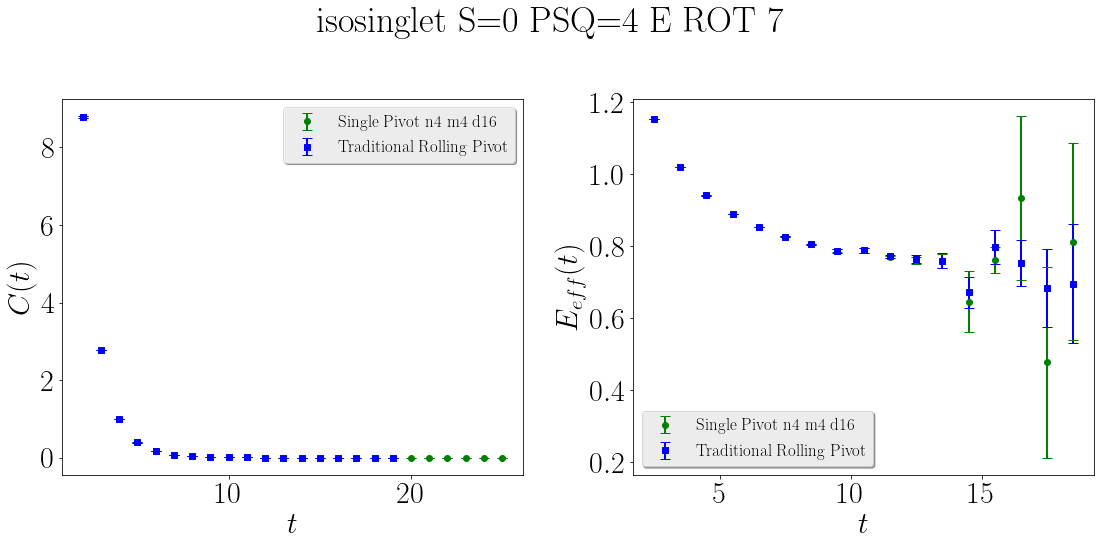

In [6]:
f = plt.figure(facecolor="white")
f.set_figwidth(16)
f.set_figheight(8)
for corr in corrs:
    plt.clf()
    f.suptitle(corr.replace("_"," "))
    for i,pivot in enumerate(files.keys()):
        hdf5_data = h5py.File(os.path.join(files[pivot],"rotated_correlators.hdf5"))
        plt.subplot(1,2,1)
        this_t, this_corr, this_err = collectCorrEstimates(hdf5_data,corr)
        plt.errorbar( this_t, this_corr,this_err, label=pivot,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
        plt.legend()
        plt.xlabel("$t$")
        plt.ylabel("$C(t)$")
        plt.subplot(1,2,2)
        this_t, this_corr, this_err = collectEnergyEstimates(hdf5_data,corr)
        plt.errorbar( this_t, this_corr,this_err, label=pivot,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
        plt.legend()
        plt.xlabel("$t$")
        plt.ylabel("$E_{eff}(t)$")
        hdf5_data.close()
    plt.tight_layout()
    plt.savefig(corr+".png")